In [1]:
import os
import pandas as pd
from sklearn import datasets
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn import tree
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation


In [2]:
init = pd.read_csv("C:\Punyaku\Rully\Botnet/init.csv")
init2 = pd.read_csv("C:\Punyaku\Rully\Botnet/init2.csv")
init3 = pd.read_csv("C:\Punyaku\Rully\Botnet/init3.csv")
init4 = pd.read_csv("C:\Punyaku\Rully\Botnet/init4.csv")
init5 = pd.read_csv("C:\Punyaku\Rully\Botnet/init5.csv")
dns1 = pd.read_csv("C:\Punyaku\Rully\Botnet/dns_application_2017_1.csv")
dns = pd.read_csv("C:\Punyaku\Rully\Botnet/dns_application_2017.csv")
appdns = pd.read_csv("C:\Punyaku\Rully\Botnet/applicationDNS.csv")

c:\Punyaku\Rully\Botnet\Botnet_Detection\.conda\lib\site-packages\IPython\core\interactiveshell.py:3552: DtypeWarning: Columns (28,29) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)
c:\Punyaku\Rully\Botnet\Botnet_Detection\.conda\lib\site-packages\IPython\core\interactiveshell.py:3552: DtypeWarning: Columns (22) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [3]:
df_botnet = pd.concat([init, init2, init3, init4, init5])
df_normal = pd.concat([dns1, dns, appdns])

# READ

In [4]:
df_normal.head()

,_path,ts,uid,id.orig_h,id.orig_p,id.resp_h,id.resp_p,proto,service,duration,...,geo.orig.region,geo.orig.city,geo.orig.latitude,geo.orig.longitude,geo.resp.country_code,geo.resp.region,geo.resp.city,geo.resp.latitude,geo.resp.longitude,community_id
0,conn,2017-06-22T02:33:10.688579Z,CY0VMc1fQcoWR3QKw7,192.168.50.60,137,192.168.50.255,137,udp,dns,1.499129s,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1:UkroHSs8STF2pM8UdWxWR0R6OD8=
1,conn,2017-06-22T02:32:37.468717Z,Cht3HLL3Moraks302,192.168.50.51,137,192.168.50.255,137,udp,dns,1.487366s,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1:bDbXDEXMRBw5v0ieUEGUSeVPiDY=
2,conn,2017-06-22T02:32:12.776697Z,CyjMmB2D1shaHKn72g,192.168.50.57,137,192.168.50.255,137,udp,dns,1.495538s,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1:JQX2G/xW3VgPHL3rw1MFNz+eTg8=
3,conn,2017-06-22T02:31:44.513718Z,CkcOml4Aww3gTnhGya,192.168.50.55,137,192.168.50.255,137,udp,dns,1.486681s,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1:oenZbl3W2wbLPK4Bu5IfR9YhNoA=
4,conn,2017-06-22T02:31:30.645201Z,Ca71arJpfnolxVaLf,192.168.50.60,138,192.168.50.255,138,udp,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1:L/9eqKhmc/yIjCbA/whb87dxmhg=


In [5]:
df_botnet.head()

,_path,ts,uid,id.orig_h,id.orig_p,id.resp_h,id.resp_p,proto,service,duration,...,geo.orig.region,geo.orig.city,geo.orig.latitude,geo.orig.longitude,geo.resp.country_code,geo.resp.region,geo.resp.city,geo.resp.latitude,geo.resp.longitude,community_id
0,conn,2017-04-25T00:01:24.221943Z,CcRRUf4FvYVy0WM1tf,192.168.50.15,49204,192.168.50.88,53,udp,dns,206us,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1:o9DmB+Xdg3mjcpAWPAa4xMSQ8PA=
1,conn,2017-04-25T00:01:05.437399Z,CskjGr1swnXFezlM0b,fe80::d58e:a29a:c48:dd8f,135,ff02::1:ff98:c06b,136,icmp,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1:/3BVcTgZBvIwH3NdRMIuCTKDsco=
2,conn,2017-04-25T00:01:05.435065Z,CAnrobD8Gp6TJUHkc,fe80::2c51:b7cc:8a98:c06b,135,ff02::1:ff48:dd8f,136,icmp,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1:4pI7NSr1zcExpnwgrplWKhUeX2Y=
3,conn,2017-04-25T00:01:05.361443Z,CP4uAC4tn9VWjhJWu7,192.168.50.18,51400,224.0.0.252,5355,udp,dns,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1:qmfbUmATO8xesLDLONvCq/Hw0hs=
4,conn,2017-04-25T00:01:05.36117Z,CmQVh52Dk2zV5D9hgj,fe80::d58e:a29a:c48:dd8f,63788,ff02::1:3,5355,udp,dns,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1:1O9I3C6IMbR1/6T8NUA+v6rvntU=


# Labelling

In [6]:
df_normal['label'] = 'Normal'
df_botnet['label'] = 'Botnet'

# Filtering By Times

In [7]:
df_normal['ts'] = pd.to_datetime(df_normal['ts'])

df_botnet['ts'] = df_botnet['ts'].str.replace('Z', '')  # Remove 'Z' from the timestamp string
try:
    df_botnet['ts'] = pd.to_datetime(df_botnet['ts'], format="%Y-%m-%dT%H:%M:%S")
except ValueError:
    df_botnet['ts'] = pd.to_datetime(df_botnet['ts'], format="%Y-%m-%dT%H:%M:%S.%f", errors='coerce')


In [8]:
df_normal['time'] = df_normal['ts'].dt.strftime('%H:%M:%S')
df_normal['date'] = df_normal['ts'].dt.strftime('%Y-%m-%d')

df_botnet['time'] = df_botnet['ts'].dt.strftime('%H:%M:%S')
df_botnet['date'] = df_botnet['ts'].dt.strftime('%Y-%m-%d')

In [9]:
df_normal.insert(2, 'time', df_normal.pop('time'))
df_normal.insert(3, 'date', df_normal.pop('date'))

df_botnet.insert(2, 'time', df_botnet.pop('time'))
df_botnet.insert(3, 'date', df_botnet.pop('date'))

In [10]:
df_normal = df_normal.sort_values(['date', 'time'], ascending=True)

df_botnet = df_botnet.sort_values(['date', 'time'], ascending=True)

In [11]:
df_normal.head()

,_path,ts,time,date,uid,id.orig_h,id.orig_p,id.resp_h,id.resp_p,proto,...,geo.orig.city,geo.orig.latitude,geo.orig.longitude,geo.resp.country_code,geo.resp.region,geo.resp.city,geo.resp.latitude,geo.resp.longitude,community_id,label
298,conn,2017-06-13 01:57:38.658640+00:00,01:57:38,2017-06-13,C1qVrt3a6cLOeBTxx2,192.168.50.51,61485,192.168.50.88,53,udp,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1:wCKQp2nV3OJvKUWkJxYMV1y5Zmw=,Normal
296,conn,2017-06-13 01:57:39.365021+00:00,01:57:39,2017-06-13,CqvrX029jPSJJseFW4,192.168.50.88,51316,8.8.4.4,53,udp,...,NaN,NaN,NaN,US,NaN,NaN,37.751,-97.822,1:PNu0goJ1FjGRydc/UbZQU7z4izg=,Normal
297,conn,2017-06-13 01:57:39.364588+00:00,01:57:39,2017-06-13,C5FyKT1tF02psaoWg9,192.168.50.19,60019,192.168.50.88,53,udp,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1:b041F23994Qmbo0E+76IpF7JCtw=,Normal
294,conn,2017-06-13 01:57:40.657703+00:00,01:57:40,2017-06-13,CWEiHh1SShNqzp0RK,192.168.50.51,59936,192.168.50.88,53,udp,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1:mxTfjGcQ4NKXLMjdY95cDBaTv90=,Normal
295,conn,2017-06-13 01:57:40.283348+00:00,01:57:40,2017-06-13,C4gcHS2lYNRehzDjGe,192.168.50.51,55221,192.168.50.88,53,udp,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1:YsCB+scJ8ppWcpZij0CAENJQ9ds=,Normal


In [12]:
df_botnet.head()

,_path,ts,time,date,uid,id.orig_h,id.orig_p,id.resp_h,id.resp_p,proto,...,geo.orig.city,geo.orig.latitude,geo.orig.longitude,geo.resp.country_code,geo.resp.region,geo.resp.city,geo.resp.latitude,geo.resp.longitude,community_id,label
44657,conn,2017-04-19 02:54:16.972588,02:54:16,2017-04-19,CxJk7F6UdwzSTe1Sk,192.168.50.11,58620,239.255.255.250,1900,udp,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1:69wLfIDkiwGxVaCOxbc9Zzkdj1g=,Botnet
44658,conn,2017-04-19 02:54:16.971992,02:54:16,2017-04-19,CcjJ5P16TDfqrGeq3c,fe80::891f:ff8f:8660:beff,58618,ff02::c,1900,udp,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1:hXgaW+IATJ3548l0uRPdSY/NaYA=,Botnet
270428,conn,2017-04-19 02:54:16.972588,02:54:16,2017-04-19,CfjRDf1MBW2erp4tyd,192.168.50.11,58620,239.255.255.250,1900,udp,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1:69wLfIDkiwGxVaCOxbc9Zzkdj1g=,Botnet
270429,conn,2017-04-19 02:54:16.971992,02:54:16,2017-04-19,CjoXX82ODGPpqAYTRj,fe80::891f:ff8f:8660:beff,58618,ff02::c,1900,udp,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1:hXgaW+IATJ3548l0uRPdSY/NaYA=,Botnet
44655,conn,2017-04-19 02:54:19.193546,02:54:19,2017-04-19,CAh3vw2cvv87Z0efx,192.168.50.14,55154,239.255.255.250,1900,udp,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1:o8LjmI2J3H3JSezvkWoV3LVa6xg=,Botnet


# Drop Unused Column

In [13]:
df_normal = df_normal.drop(['geo.orig.country_code','geo.orig.region','geo.orig.city',
              'geo.resp.latitude','geo.resp.longitude','geo.orig.latitude',
              'tunnel_parents','geo.orig.longitude','geo.resp.country_code',
              'geo.resp.region','geo.resp.city','local_orig','local_resp'], axis=1)


df_botnet = df_botnet.drop(['geo.orig.country_code','geo.orig.region','geo.orig.city',
              'geo.resp.latitude','geo.resp.longitude','geo.orig.latitude',
              'tunnel_parents','geo.orig.longitude','geo.resp.country_code',
              'geo.resp.region','geo.resp.city','local_orig','local_resp'], axis=1)

# Handling Missing Value

In [14]:
#Replace With Mean
def replace_missing_with_mean(df, columns):
    #Count mean in column
    mean_values = df[columns].mean()
    
    # Replace missing value with mean
    df[columns] = df[columns].fillna(mean_values)
    
    return df

#Replace With Median
def replace_missing_with_median(df, columns):
    #Get Median in column
    median_values = df[columns].median()
    
    # Replace missing value with median
    df[columns] = df[columns].fillna(median_values)
    
    return df

#Replace with Mode
def replace_missing_with_mode(df, columns):
    #Get Mode Value in Column
    mode_values = df[columns].mode().iloc[0]
    
    # Replace missing value with median
    df[columns] = df[columns].fillna(mode_values)
    
    return df

#Replace with 0 Value
def replace_missing_with_zero(df, columns):
    #Zero Value
    zero_value = 0
    
    # Replace missing value with median
    df[columns] = df[columns].fillna(zero_value)
    
    return df

def replace_missing_with_previous_row(df, column):

    df[column].fillna(method='ffill', inplace=True)
    
    return df

## Drop Missing Value In Duration

In [15]:
df_normal = df_normal.dropna(subset=['duration'])

df_botnet = df_botnet.dropna(subset=['duration'])

## Handling Missing Value With Previous Row

In [16]:
df_normal = replace_missing_with_previous_row(df_normal, 'service')
df_normal = replace_missing_with_previous_row(df_normal, 'orig_bytes')
df_normal = replace_missing_with_previous_row(df_normal, 'resp_bytes')
df_normal = replace_missing_with_previous_row(df_normal, 'history')


df_botnet = replace_missing_with_previous_row(df_botnet, 'service')
df_botnet = replace_missing_with_previous_row(df_botnet, 'orig_bytes')
df_botnet = replace_missing_with_previous_row(df_botnet, 'resp_bytes')
df_botnet = replace_missing_with_previous_row(df_botnet, 'history')

In [17]:
missing = pd.isnull(df_normal).sum()
missing

_path            0
ts               0
time             0
date             0
uid              0
id.orig_h        0
id.orig_p        0
id.resp_h        0
id.resp_p        0
proto            0
service          0
duration         0
orig_bytes       0
resp_bytes       0
conn_state       0
missed_bytes     0
history          0
orig_pkts        0
orig_ip_bytes    0
resp_pkts        0
resp_ip_bytes    0
community_id     0
label            0
dtype: int64

In [18]:
df_botnet = replace_missing_with_previous_row(df_botnet, 'service')

In [19]:
missing = pd.isnull(df_botnet).sum()
missing

_path             0
ts                0
time              0
date              0
uid               0
id.orig_h         0
id.orig_p         0
id.resp_h         0
id.resp_p         0
proto             0
service          36
duration          0
orig_bytes        0
resp_bytes        0
conn_state        0
missed_bytes      0
history           0
orig_pkts         0
orig_ip_bytes     0
resp_pkts         0
resp_ip_bytes     0
community_id      0
label             0
dtype: int64

In [20]:
df_botnet = df_botnet.dropna(subset=['service'])

In [21]:
pd.isnull(df_botnet).sum()

_path            0
ts               0
time             0
date             0
uid              0
id.orig_h        0
id.orig_p        0
id.resp_h        0
id.resp_p        0
proto            0
service          0
duration         0
orig_bytes       0
resp_bytes       0
conn_state       0
missed_bytes     0
history          0
orig_pkts        0
orig_ip_bytes    0
resp_pkts        0
resp_ip_bytes    0
community_id     0
label            0
dtype: int64

# Merge Dataframe Normal & Botnet

In [22]:
df = pd.concat([df_botnet,df_normal])
df

,_path,ts,time,date,uid,id.orig_h,id.orig_p,id.resp_h,id.resp_p,proto,...,resp_bytes,conn_state,missed_bytes,history,orig_pkts,orig_ip_bytes,resp_pkts,resp_ip_bytes,community_id,label
44629,conn,2017-04-19 03:02:58.018252,03:02:58,2017-04-19,CQ5LIk3ALzjX5SQdah,192.168.50.88,37890,142.104.64.203,1922,tcp,...,2223.0,SF,0,ShADadFf,19,2921,18,3167,1:FHcgw0DRDUkWdQWX2ckx+VBYIR4=,Botnet
270400,conn,2017-04-19 03:02:58.018252,03:02:58,2017-04-19,C1DIHQ2QCOJ9GLkWc2,192.168.50.88,37890,142.104.64.203,1922,tcp,...,2223.0,SF,0,ShADadFf,19,2921,18,3167,1:FHcgw0DRDUkWdQWX2ckx+VBYIR4=,Botnet
44628,conn,2017-04-19 03:03:22.345278,03:03:22,2017-04-19,CXCYO01cFAOURi14w9,fe80::d58e:a29a:c48:dd8f,546,ff02::1:2,547,udp,...,0.0,S0,0,D,7,973,0,0,1:hBhE2ZQ6mkjyQ7enfKelPcc668k=,Botnet
270399,conn,2017-04-19 03:03:22.345278,03:03:22,2017-04-19,CTPHiOxhjbmwk6Yj5,fe80::d58e:a29a:c48:dd8f,546,ff02::1:2,547,udp,...,0.0,S0,0,D,7,973,0,0,1:hBhE2ZQ6mkjyQ7enfKelPcc668k=,Botnet
44627,conn,2017-04-19 03:03:24.369288,03:03:24,2017-04-19,CvHpwH3ORu8EOrKz0d,192.168.50.88,37892,142.104.64.203,1922,tcp,...,2171.0,SF,0,ShADadFf,17,2669,16,3011,1:PPQaDVS78HfscnudgpLSN4BctrE=,Botnet
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5,conn,2017-06-22 02:31:18.910432+00:00,02:31:18,2017-06-22,CiirRXKde30MJmKH9,192.168.50.54,137,192.168.50.255,137,udp,...,0.0,S0,0,D,3,234,0,0,1:xYIOMqjOrJmPCT1lKoPiXQSXrDU=,Normal
3,conn,2017-06-22 02:31:44.513718+00:00,02:31:44,2017-06-22,CkcOml4Aww3gTnhGya,192.168.50.55,137,192.168.50.255,137,udp,...,0.0,S0,0,D,3,234,0,0,1:oenZbl3W2wbLPK4Bu5IfR9YhNoA=,Normal
2,conn,2017-06-22 02:32:12.776697+00:00,02:32:12,2017-06-22,CyjMmB2D1shaHKn72g,192.168.50.57,137,192.168.50.255,137,udp,...,0.0,S0,0,D,3,234,0,0,1:JQX2G/xW3VgPHL3rw1MFNz+eTg8=,Normal
1,conn,2017-06-22 02:32:37.468717+00:00,02:32:37,2017-06-22,Cht3HLL3Moraks302,192.168.50.51,137,192.168.50.255,137,udp,...,0.0,S0,0,D,3,234,0,0,1:bDbXDEXMRBw5v0ieUEGUSeVPiDY=,Normal


# Ekstraksi Fitur

### Handling Duration Data

In [23]:
short_values = [value for value in df['duration'] if len(value) < 5]
print(short_values)

['96us', '96us', '96us', '96us', '94us', '94us', '98us', '98us', '98us', '98us', '99us', '99us', '84us', '84us', '99us', '99us', '90us', '90us', '83us', '83us', '80us', '80us', '99us', '99us', '80us', '80us', '99us', '99us', '94us', '94us', '94us', '94us', '87us', '87us', '99us', '99us', '79us', '79us', '97us', '97us', '41us', '41us', '70us', '95us', '70us', '95us', '66us', '66us', '63us', '98us', '63us', '98us', '78us', '78us', '87us', '87us', '84us', '84us', '94us', '94us', '82us', '82us', '67us', '67us', '75us', '75us', '90us', '90us', '72us', '72us', '95us', '95us', '99us', '99us', '98us', '98us', '99us', '99us', '97us', '97us', '97us', '97us', '95us', '95us', '80us', '80us', '95us', '95us', '98us', '98us', '98us', '98us', '89us', '89us', '95us', '95us', '98us', '98us', '80us', '80us', '99us', '99us', '95us', '95us', '96us', '96us', '99us', '99us', '93us', '93us', '97us', '97us', '91us', '91us', '95us', '95us', '96us', '96us', '83us', '83us', '99us', '99us', '91us', '91us', '81us',

In [24]:
print(df['duration'])

44629      24.437321s
270400     24.437321s
44628     1m2.995895s
270399    1m2.995895s
44627      14.908373s
             ...     
5           1.493839s
3           1.486681s
2           1.495538s
1           1.487366s
0           1.499129s
Name: duration, Length: 1302998, dtype: object


In [25]:
def process_time_string(time_string):
    time_unit = time_string[-2:]
    time_unit_s = time_string[-1:]
    time_value = time_string.replace('.', '')
    time_value_new = time_string.replace('.', '')
    time_value_new2 = time_string.replace('.', '')
    time_value_new3 = time_string.replace('.', '')
    if time_string.strip():
        if len(time_string) > 4:
            if time_string[1] == 'm':
                time_value = float(time_string[0]) * 60
                # time_value_new = time_value_new[2:]
                if time_unit == 'ms':
                    time_value_new = float(time_string[2:].replace('ms', '')) / 1000
                    time_total = time_value + time_value_new
                    return time_total
                elif time_unit == 'us':
                    time_value_new = float(time_string[2:].replace('us', '')) / 1000000
                    time_total = time_value + time_value_new
                    return time_total 
                elif time_unit_s == 's':
                    time_value_new = float(time_string[2:].replace('s', '')) 
                    time_total = time_value + time_value_new
                    return time_total
            elif time_string[2] == 'm':
                time_value = float(time_string[0]) * 60 * 10 + float(time_string[1]) * 60
                # time_value_new = time_string.replace('m', '')
                if time_unit == 'ms':
                    time_value_new = float(time_string[3:].replace('ms', '')) / 1000
                    time_total = time_value + time_value_new
                    return time_total
                elif time_unit == 'us':
                    time_value_new = float(time_string[3:].replace('us', '')) / 1000000
                    time_total = time_value + time_value_new
                    return time_total 
                elif time_unit_s == 's':
                        time_value_new = float(time_string[3:].replace('s', ''))
                        time_total = time_value + time_value_new
                        return time_total
            elif time_string[1] == 'd':
                time_value = float(time_string[0]) * 86400
                if time_string[3] == 'h':
                    time_value_new = float(time_string[2]) * 3600
                    if time_string[5] == 'm':
                        time_value_new2 = float(time_string[4]) * 60
                        if time_unit == 'ms':
                            time_value_new3 = float(time_string[6:].replace('ms', '')) / 1000
                            time_total = time_value + time_value_new + time_value_new2 + time_value_new3
                            return time_total 
                        elif time_unit == 'us':
                            time_value_new3 = float(time_string[6:].replace('us', '')) / 1000000
                            time_total = time_value + time_value_new + time_value_new2 + time_value_new3
                            return time_total 
                        elif time_unit_s == 's':
                            time_value_new3 = float(time_string[6:].replace('s', '')) 
                            time_total = time_value + time_value_new + time_value_new2 + time_value_new3
                            return time_total
                    elif time_string[6] == 'm':
                        time_value_new2 = float(time_string[4]) * 60 * 10 + float(time_string[5]) * 60
                        if time_unit == 'ms':
                            time_value_new3 = float(time_string[7:].replace('ms', '')) / 1000
                            time_total = time_value + time_value_new + time_value_new2 + time_value_new3
                            return time_total
                        elif time_unit == 'us':
                            time_value_new3 = float(time_string[7:].replace('us', '')) / 1000000
                            time_total = time_value + time_value_new + time_value_new2 + time_value_new3
                            return time_total 
                        elif time_unit_s == 's':
                            time_value_new3 = float(time_string[7:].replace('s', '')) 
                            time_total = time_value + time_value_new + time_value_new2 + time_value_new3
                            return time_total
                elif time_string[4] == 'h':
                    time_value_new = float(time_string[2]) * 3600 * 10 + float(time_string[3]) * 3600
                    if time_string[6] == 'm':
                        time_value_new2 = float(time_string[5]) * 60
                        if time_unit == 'ms':
                            time_value_new3 = float(time_string[7:].replace('ms', '')) / 1000
                            time_total = time_value + time_value_new + time_value_new2 + time_value_new3
                            return time_total
                        elif time_unit == 'us':
                            time_value_new3 = float(time_string[7:].replace('us', '')) / 1000000
                            time_total = time_value + time_value_new + time_value_new2 + time_value_new3
                            return time_total
                        elif time_unit_s == 's':
                            time_value_new3 = float(time_string[7:].replace('s', '')) 
                            time_total = time_value + time_value_new + time_value_new2 + time_value_new3
                            return time_total
                    elif time_string[7] == 'm':
                        time_value_new2 = float(time_string[5]) * 60 * 10 + float(time_string[6]) * 60
                        if time_unit == 'ms':
                            time_value_new3 = float(time_string[8:].replace('ms', '')) / 1000
                            time_total = time_value + time_value_new + time_value_new2 + time_value_new3
                            return time_total
                        elif time_unit == 'us':
                            time_value_new3 = float(time_string[8:].replace('us', '')) / 1000000
                            time_total = time_value + time_value_new + time_value_new2 + time_value_new3
                            return time_total
                        elif time_unit_s == 's':
                            time_value_new3 = float(time_string[8:].replace('s', '')) 
                            time_total = time_value + time_value_new + time_value_new2 + time_value_new3
                            return time_total
            elif time_string[2] == 'd':
                time_value = float(time_string[0]) * 86400 * 10 + float(time_string[1]) *86400
                if time_string[4] == 'h':
                    time_value_new = float(time_string[3]) * 3600
                    if time_string[6] == 'm':
                        time_value_new2 = float(time_string[5]) * 60
                        if time_unit == 'ms':
                            time_value_new3 = float(time_string[7:].replace('ms', '')) / 1000
                            time_total = time_value + time_value_new + time_value_new2 + time_value_new3
                            return time_total 
                        elif time_unit_s == 's':
                            time_value_new3 = float(time_string[7:].replace('s', '')) 
                            time_total = time_value + time_value_new + time_value_new2 + time_value_new3
                            return time_total
                    elif time_string[7] == 'm':
                        time_value_new2 = float(time_string[5]) * 60 * 10 + float(time_string[6]) * 60
                        if time_unit == 'ms':
                            time_value_new3 = float(time_string[8:].replace('ms', '')) / 1000
                            time_total = time_value + time_value_new + time_value_new2 + time_value_new3
                            return time_total 
                        elif time_unit_s == 's':
                            time_value_new3 = float(time_string[8:].replace('s', '')) 
                            time_total = time_value + time_value_new + time_value_new2 + time_value_new3
                            return time_total
                elif time_string[5] == 'h':
                    time_value_new = float(time_string[3]) * 3600 * 10 + float(time_string[4]) * 3600
                    if time_string[6] == 'm':
                        time_value_new2 = float(time_string[5]) * 60
                        if time_unit == 'ms':
                            time_value_new3 = float(time_string[7:].replace('ms', '')) / 1000
                            time_total = time_value + time_value_new + time_value_new2 + time_value_new3
                            return time_total 
                        elif time_unit_s == 's':
                            time_value_new3 = float(time_string[7:].replace('s', '')) 
                            time_total = time_value + time_value_new + time_value_new2 + time_value_new3
                            return time_total
                    elif time_string[7] == 'm':
                        time_value_new2 = float(time_string[5]) * 60 * 10 + float(time_string[6]) * 60
                        if time_unit == 'ms':
                            time_value_new3 = float(time_string[7:].replace('ms', '')) / 1000
                            time_total = time_value + time_value_new + time_value_new2 + time_value_new3
                            return time_total 
                        elif time_unit_s == 's':
                            time_value_new3 = float(time_string[7:].replace('s', '')) 
                            time_total = time_value + time_value_new + time_value_new2 + time_value_new3
                            return time_total
            elif time_unit == 'ms':
                time_value = float(time_string.replace('ms', '')) / 1000
                return time_value
            elif time_unit == 'us':
                time_value = float(time_string.replace('us', '')) / 1000000
                return time_value
            elif time_unit_s == 's':
                time_value = float(time_string.replace('s', ''))
                return time_value
            else:
                return time_value
        else: 
            if time_unit == 'ms':
                time_value = float(time_string.replace('ms', '')) / 1000
                return time_value
            elif time_string[1] == 'm':
                time_value = float(time_string[0]) * 60
                # time_value_new = time_value_new[2:]
                if time_unit == 'ms':
                    time_value_new = float(time_string[2:].replace('ms', '')) / 1000
                    time_total = time_value + time_value_new
                    return time_total
                elif time_unit == 'us':
                    time_value_new = float(time_string[2:].replace('us', '')) / 1000000
                    time_total = time_value + time_value_new
                    return time_total 
                elif time_unit_s == 's':
                    time_value_new = float(time_string[2:].replace('s', '')) 
                    time_total = time_value + time_value_new
                    return time_total
            elif time_unit == 'us':
                time_value = float(time_string.replace('us', '')) / 1000000
                return time_value
            elif time_unit_s == 's':
                time_value = float(time_string.replace('s', ''))
                return time_value
            else:
                return time_value
            

df['duration'] = df['duration'].apply(lambda x: process_time_string(x) if isinstance(x, str) else x)

print(df['duration'])

44629     24.437321
270400    24.437321
44628     62.995895
270399    62.995895
44627     14.908373
            ...    
5          1.493839
3          1.486681
2          1.495538
1          1.487366
0          1.499129
Name: duration, Length: 1302998, dtype: float64


In [26]:
pd.isnull(df).sum()

_path            0
ts               0
time             0
date             0
uid              0
id.orig_h        0
id.orig_p        0
id.resp_h        0
id.resp_p        0
proto            0
service          0
duration         0
orig_bytes       0
resp_bytes       0
conn_state       0
missed_bytes     0
history          0
orig_pkts        0
orig_ip_bytes    0
resp_pkts        0
resp_ip_bytes    0
community_id     0
label            0
dtype: int64

### Ekstraksi

In [27]:
df['PX'] = df['orig_pkts'] + df['resp_pkts']

df['NNP'] = np.where(df['orig_pkts'] + df['resp_pkts'] == 0, 1, 0)

df['NSP'] = ((63 >= df['orig_pkts'] + df['resp_pkts']) & (df['orig_pkts'] + df['resp_pkts'] <= 400)).astype(int)

df['PSP'] = df['NSP'] / df['PX'] 

df['IOPR'] = df['orig_pkts'] + df['resp_pkts']

df['reconnection'] = np.where(df['history'].str.contains('Sr%'), 1, 0)
df['reconnection'] = df['reconnection'].fillna(0).astype(int)

df['FPS'] = df['orig_ip_bytes'] / df['orig_pkts']
df['FPS'] = df['FPS'].fillna(0)

df['TBT'] = df['orig_ip_bytes'] + df['resp_ip_bytes']

df['APL'] = (df['orig_ip_bytes'] + df['resp_ip_bytes']) / df['PX']

df['BS'] = ((df['orig_ip_bytes']+ df['resp_ip_bytes'])* 8 ) / df['duration']

df['PS'] =(df['orig_pkts'] + df['resp_pkts']) / df['duration'] 

df['PPS'] = (df['orig_pkts'] + df['resp_pkts']) / df['duration'] 

# Normalisasi Data

In [28]:
# Normalisasi
sc = MinMaxScaler(feature_range=(0, 1))

#Reset Index untuk duplikasi
dfnew = df
df = df.reset_index(drop=True)

# Apply the Min-Max Scaler to the numerical columns
dfnew = pd.DataFrame(data=sc.fit_transform(df.select_dtypes(include=['float64', 'int64'])), columns=df.select_dtypes(include=['float64', 'int64']).columns)

#duplikasi label
dfnew['label'] = df['label']


In [29]:
pd.isnull(dfnew).sum()

id.orig_p        0
id.resp_p        0
duration         0
orig_bytes       0
resp_bytes       0
missed_bytes     0
orig_pkts        0
orig_ip_bytes    0
resp_pkts        0
resp_ip_bytes    0
PX               0
PSP              0
IOPR             0
FPS              0
TBT              0
APL              0
BS               0
PS               0
PPS              0
label            0
dtype: int64

# Shuffle Row

In [30]:
dfnew = dfnew.sample(frac=1).reset_index(drop=True)
dfnew

,id.orig_p,id.resp_p,duration,orig_bytes,resp_bytes,missed_bytes,orig_pkts,orig_ip_bytes,resp_pkts,resp_ip_bytes,PX,PSP,IOPR,FPS,TBT,APL,BS,PS,PPS,label
0,0.944790,0.306000,1.114291e-07,2.627125e-07,0.000000,0.0,0.000061,8.328144e-07,0.00000,0.000000,0.000000,1.000000,0.000000,0.003118,2.486881e-07,0.001417,3.992505e-06,9.159684e-06,9.159684e-06,Botnet
1,0.958890,0.003029,1.022420e-05,1.403124e-06,0.000017,0.0,0.000153,2.230753e-06,0.00006,0.000027,0.000123,0.333333,0.000123,0.003341,2.084243e-06,0.001755,1.310985e-07,2.846024e-07,2.846024e-07,Botnet
2,0.803012,0.003029,1.022431e-05,7.881376e-07,0.000016,0.0,0.000092,1.284914e-06,0.00006,0.000026,0.000061,0.500000,0.000061,0.003208,1.125017e-06,0.001552,8.063218e-08,1.846040e-07,1.846040e-07,Botnet
3,0.998886,0.003029,1.274395e-08,2.268881e-07,0.000098,0.0,0.000031,3.926125e-07,0.00006,0.000106,0.000000,1.000000,0.000000,0.002940,1.545419e-06,0.008807,8.970535e-05,8.020281e-05,8.020281e-05,Botnet
4,0.814533,0.003029,5.642510e-09,1.671807e-07,0.000195,0.0,0.000031,3.331258e-07,0.00006,0.000201,0.000000,1.000000,0.000000,0.002495,3.025705e-06,0.017242,3.436859e-04,1.811440e-04,1.811440e-04,Botnet
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1302993,0.912135,0.003029,1.022417e-05,5.731910e-07,0.000012,0.0,0.000092,1.070761e-06,0.00006,0.000022,0.000061,0.500000,0.000061,0.002673,8.408025e-07,0.000742,6.568074e-08,1.846069e-07,1.846069e-07,Botnet
1302994,0.892816,0.003029,1.022428e-05,7.881376e-07,0.000016,0.0,0.000092,1.284914e-06,0.00006,0.000026,0.000061,0.500000,0.000061,0.003208,1.125017e-06,0.001552,8.063246e-08,1.846047e-07,1.846047e-07,Botnet
1302995,0.863578,0.003029,1.022424e-05,1.403124e-06,0.000017,0.0,0.000153,2.230753e-06,0.00006,0.000027,0.000123,0.333333,0.000123,0.003341,2.084243e-06,0.001755,1.310979e-07,2.846012e-07,2.846012e-07,Botnet
1302996,0.845968,0.003029,4.092895e-06,4.537762e-07,0.000014,0.0,0.000061,7.852250e-07,0.00006,0.000024,0.000031,0.666667,0.000031,0.002940,5.921145e-07,0.001147,1.449954e-07,3.593046e-07,3.593046e-07,Botnet


# Klasifikasi Decision Tree

### Data Keseluruhan

In [31]:
from sklearn.model_selection import train_test_split
X = dfnew.drop('label', axis=1)
y = dfnew['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y)
X

,id.orig_p,id.resp_p,duration,orig_bytes,resp_bytes,missed_bytes,orig_pkts,orig_ip_bytes,resp_pkts,resp_ip_bytes,PX,PSP,IOPR,FPS,TBT,APL,BS,PS,PPS
0,0.944790,0.306000,1.114291e-07,2.627125e-07,0.000000,0.0,0.000061,8.328144e-07,0.00000,0.000000,0.000000,1.000000,0.000000,0.003118,2.486881e-07,0.001417,3.992505e-06,9.159684e-06,9.159684e-06
1,0.958890,0.003029,1.022420e-05,1.403124e-06,0.000017,0.0,0.000153,2.230753e-06,0.00006,0.000027,0.000123,0.333333,0.000123,0.003341,2.084243e-06,0.001755,1.310985e-07,2.846024e-07,2.846024e-07
2,0.803012,0.003029,1.022431e-05,7.881376e-07,0.000016,0.0,0.000092,1.284914e-06,0.00006,0.000026,0.000061,0.500000,0.000061,0.003208,1.125017e-06,0.001552,8.063218e-08,1.846040e-07,1.846040e-07
3,0.998886,0.003029,1.274395e-08,2.268881e-07,0.000098,0.0,0.000031,3.926125e-07,0.00006,0.000106,0.000000,1.000000,0.000000,0.002940,1.545419e-06,0.008807,8.970535e-05,8.020281e-05,8.020281e-05
4,0.814533,0.003029,5.642510e-09,1.671807e-07,0.000195,0.0,0.000031,3.331258e-07,0.00006,0.000201,0.000000,1.000000,0.000000,0.002495,3.025705e-06,0.017242,3.436859e-04,1.811440e-04,1.811440e-04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1302993,0.912135,0.003029,1.022417e-05,5.731910e-07,0.000012,0.0,0.000092,1.070761e-06,0.00006,0.000022,0.000061,0.500000,0.000061,0.002673,8.408025e-07,0.000742,6.568074e-08,1.846069e-07,1.846069e-07
1302994,0.892816,0.003029,1.022428e-05,7.881376e-07,0.000016,0.0,0.000092,1.284914e-06,0.00006,0.000026,0.000061,0.500000,0.000061,0.003208,1.125017e-06,0.001552,8.063246e-08,1.846047e-07,1.846047e-07
1302995,0.863578,0.003029,1.022424e-05,1.403124e-06,0.000017,0.0,0.000153,2.230753e-06,0.00006,0.000027,0.000123,0.333333,0.000123,0.003341,2.084243e-06,0.001755,1.310979e-07,2.846012e-07,2.846012e-07
1302996,0.845968,0.003029,4.092895e-06,4.537762e-07,0.000014,0.0,0.000061,7.852250e-07,0.00006,0.000024,0.000031,0.666667,0.000031,0.002940,5.921145e-07,0.001147,1.449954e-07,3.593046e-07,3.593046e-07


### Data Balanced

In [32]:
# Memotong jumlah data botnet agar sama dengan jumlah data normal
botnet_count = (dfnew['label'] == 'Botnet').sum()
normal_count = (dfnew['label'] == 'Normal').sum()

if botnet_count > normal_count:
    data1 = pd.concat([dfnew[dfnew['label'] == 'Botnet'].head(normal_count), dfnew[dfnew['label'] == 'Normal']])
else:
    data1 = pd.concat([dfnew[dfnew['label'] == 'Botnet'], dfnew[dfnew['label'] == 'Normal'].head(botnet_count)])

# Menampilkan jumlah data di setiap kategori setelah dipotong
print(data1['label'].value_counts())

Botnet    97368
Normal    97368
Name: label, dtype: int64


In [33]:
y1 = data1['label']
X1 = data1.drop('label', axis=1)

In [34]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size=0.2, stratify=y1)

# Klasifikasi

In [35]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from numpy import mean
from numpy import std
from sklearn.tree import export_text

# Decision Tree Entire Data

In [36]:
# Decision Tree classifer object
clf = DecisionTreeClassifier(max_depth = None, min_samples_split = 2)

# Train Decision Tree
clf = clf.fit(X_train,y_train)

#Predict
y_pred = clf.predict(X_test)

# hasil
score = metrics.accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(score)
print(report)

0.9750575594781274
              precision    recall  f1-score   support

      Botnet       0.98      0.99      0.99    241126
      Normal       0.89      0.77      0.82     19474

    accuracy                           0.98    260600
   macro avg       0.93      0.88      0.90    260600
weighted avg       0.97      0.98      0.97    260600



# K-Fold Decision Tree Entire Data

In [37]:
cv = KFold(n_splits=10, random_state=1, shuffle=True)
scores = cross_val_score(clf, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
print('Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

TerminatedWorkerError: A worker process managed by the executor was unexpectedly terminated. This could be caused by a segmentation fault while calling the function or by an excessive memory usage causing the Operating System to kill the worker.


# Decision Tree Balanced Data

In [ ]:
# Decision Tree classifer object
model1 = DecisionTreeClassifier(max_depth = None, min_samples_split = 2)

# Train Decision Tree
model1 = model1.fit(X_train1,y_train1)

#Predict
y_pred1 = model1.predict(X_test1)

# hasil
score = metrics.accuracy_score(y_test1, y_pred1)
report = classification_report(y_test1, y_pred1)
print(score)
print(report)

0.9483670535072404
              precision    recall  f1-score   support

      Botnet       0.97      0.93      0.95     19474
      Normal       0.93      0.97      0.95     19474

    accuracy                           0.95     38948
   macro avg       0.95      0.95      0.95     38948
weighted avg       0.95      0.95      0.95     38948



# K-Fold Decision Tree Balanced Data

In [ ]:
cv2 = KFold(n_splits=10, random_state=1, shuffle=True)
scores = cross_val_score(model1, X, y, scoring='accuracy', cv=cv2, n_jobs=-1)
print('Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

Accuracy: 0.975 (0.001)


# Confusion Matrix

In [ ]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test1, y_pred1)

print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[18026  1448]
 [  563 18911]]


# Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

In [ ]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size=0.2, stratify=y1)

In [ ]:
X_train1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 155788 entries, 82483 to 441370
Data columns (total 19 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   id.orig_p      155788 non-null  float64
 1   id.resp_p      155788 non-null  float64
 2   duration       155788 non-null  float64
 3   orig_bytes     155788 non-null  float64
 4   resp_bytes     155788 non-null  float64
 5   missed_bytes   155788 non-null  float64
 6   orig_pkts      155788 non-null  float64
 7   orig_ip_bytes  155788 non-null  float64
 8   resp_pkts      155788 non-null  float64
 9   resp_ip_bytes  155788 non-null  float64
 10  PX             155788 non-null  float64
 11  PSP            155788 non-null  float64
 12  IOPR           155788 non-null  float64
 13  FPS            155788 non-null  float64
 14  TBT            155788 non-null  float64
 15  APL            155788 non-null  float64
 16  BS             155788 non-null  float64
 17  PS             155788 non

In [ ]:
rf = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)

In [ ]:
rf = rf.fit(X_train1,y_train1)

In [ ]:
y_pred1 = rf.predict(X_test1)

In [ ]:
print("Classification Report:")
print(classification_report(y_test1, y_pred1))

Classification Report:
              precision    recall  f1-score   support

      Botnet       0.98      0.92      0.95     19474
      Normal       0.93      0.99      0.96     19474

    accuracy                           0.95     38948
   macro avg       0.96      0.95      0.95     38948
weighted avg       0.96      0.95      0.95     38948



## Confusion Matrix Random Forest

In [ ]:
# from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix

matrix = confusion_matrix(y_test1, y_pred1)
plt.show() 

# K-Fold Random Forest

In [ ]:
kfrf = KFold(n_splits=10, random_state=1, shuffle=True)
scores = cross_val_score(rf, X_train1, y_train1, scoring='accuracy', cv=kfrf, n_jobs=-1)
print('Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

Accuracy: 0.955 (0.002)


# SVM

In [ ]:
# from sklearn import svm
# from sklearn.metrics import accuracy_score

# svm_model = svm.SVC()
# svm_model.fit(X_train1, y_train1)

# y_pred1 = svm_model.predict(X_test1)
# accuracy = accuracy_score(y_test1, y_pred1)
# print("Accuracy:", accuracy)

Accuracy: 0.8476943617130533


## Confusion Matrix SVM

C:\Users\Rully Rosadi\AppData\Roaming\Python\Python37\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


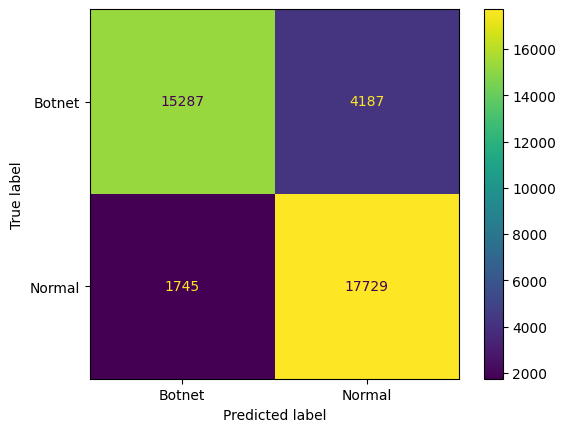

In [ ]:
# from sklearn.metrics import plot_confusion_matrix
# matrix = confusion_matrix(y_test1, y_pred1)
# plot_confusion_matrix(svm_model, X_test1, y_test1)  
# plt.show() 

## K-Fold Cross Validation

In [ ]:
# k = 5
# cv_scores = cross_val_score(svm_model, X_train1, y_train1, cv=k)

# # Calculate the mean and standard deviation of the cross-validation scores
# mean_accuracy = cv_scores.mean()
# std_accuracy = cv_scores.std()

# print(f"Cross-Validation Accuracy (k={k}): {mean_accuracy:.4f} +/- {std_accuracy:.4f}")

# Neural Network

In [39]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Label encoding for binary classification (Botnet = 0, Normal = 1)
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train1)
y_test_encoded = label_encoder.transform(y_test1)

# Create a sequential model
ann = Sequential()

# Add a fully connected layer with 32 units and 'relu' activation function
ann.add(Dense(32, activation='relu', input_dim=X_train1.shape[1]))

# Add another fully connected layer with 16 units and 'relu' activation function
ann.add(Dense(16, activation='relu'))

# Add the output layer with 1 unit and sigmoid activation function (for binary classification)
ann.add(Dense(1, activation='sigmoid'))

# Compile the model with binary cross-entropy loss and Adam optimizer
ann.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
epochs = 10
batch_size = 32
ann.fit(X_train1, y_train_encoded, epochs=epochs, batch_size=batch_size, validation_split=0.1)

# Evaluate the model on the test set
loss, accuracy = ann.evaluate(X_test1, y_test_encoded)
print(f"Test loss: {loss:.4f}, Test accuracy: {accuracy:.4f}")


Epoch 1/10
4382/4382 [==============================] - 8s 2ms/step - loss: 0.4595 - accuracy: 0.7983 - val_loss: 0.3854 - val_accuracy: 0.8492
Epoch 2/10
4382/4382 [==============================] - 7s 2ms/step - loss: 0.3694 - accuracy: 0.8542 - val_loss: 0.3643 - val_accuracy: 0.8572
Epoch 3/10
4382/4382 [==============================] - 6s 1ms/step - loss: 0.3527 - accuracy: 0.8587 - val_loss: 0.3487 - val_accuracy: 0.8594
Epoch 4/10
4382/4382 [==============================] - 6s 1ms/step - loss: 0.3413 - accuracy: 0.8621 - val_loss: 0.3373 - val_accuracy: 0.8629
Epoch 5/10
4382/4382 [==============================] - 7s 2ms/step - loss: 0.3315 - accuracy: 0.8649 - val_loss: 0.3325 - val_accuracy: 0.8667
Epoch 6/10
4382/4382 [==============================] - 6s 1ms/step - loss: 0.3246 - accuracy: 0.8667 - val_loss: 0.3334 - val_accuracy: 0.8712
Epoch 7/10
4382/4382 [==============================] - 6s 1ms/step - loss: 0.3209 - accuracy: 0.8691 - val_loss: 0.3183 - val_accuracy:

# Confusion Matrix

1218/1218 [==============================] - 2s 1ms/step


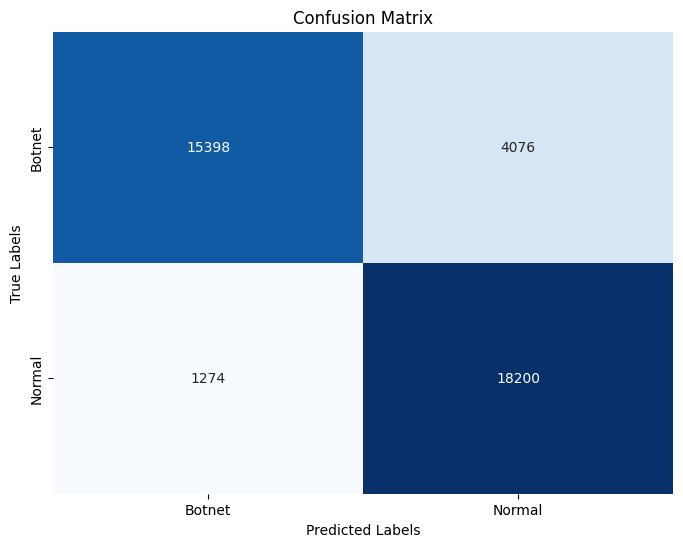

In [40]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Generate predictions for the test data
y_pred_proba = ann.predict(X_test1)
y_pred = (y_pred_proba > 0.5).astype(int)

# Create a confusion matrix
cm = confusion_matrix(y_test_encoded, y_pred)

class_names = label_encoder.inverse_transform([0, 1])

# Plot the confusion matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False, xticklabels=class_names, yticklabels=class_names)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()


# Cross Validation ANN

In [42]:
import numpy as np
from sklearn.model_selection import cross_val_predict, StratifiedKFold
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier

# Define the number of folds (k)
k = 9

# Define a function to create your ANN model
def create_ann():
    ann = Sequential()
    ann.add(Dense(32, activation='relu', input_dim=X_train1.shape[1]))
    ann.add(Dense(16, activation='relu'))
    ann.add(Dense(1, activation='sigmoid'))
    ann.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return ann

# Create a KerasClassifier wrapper
estimator = KerasClassifier(build_fn=create_ann, epochs=10, batch_size=32, verbose=0)

# Create a pipeline with a standard scaler and the KerasClassifier
pipeline = Pipeline([
    ('scaler', StandardScaler()),  # You can choose to scale the features if needed
    ('keras', estimator)
])

# Create a stratified k-fold cross-validator
cv = StratifiedKFold(n_splits=k, shuffle=True, random_state=42)

# Perform cross-validation and get predicted labels
predicted_labels = cross_val_predict(pipeline, X_train1, y_train_encoded, cv=cv, method='predict')

# Calculate accuracy for each fold
fold_accuracies = [np.mean(predicted_labels[i] == y_train_encoded[i]) for i in range(k)]

# Print accuracy for each fold
for fold_num, accuracy in enumerate(fold_accuracies, start=1):
    print(f"Fold {fold_num} Accuracy: {accuracy:.4f}")

# Calculate the mean and standard deviation of the cross-validation accuracies
mean_accuracy = np.mean(fold_accuracies)
std_accuracy = np.std(fold_accuracies)

print(f"\nCross-Validation Accuracy (k={k}): {mean_accuracy:.4f} +/- {std_accuracy:.4f}")


c:\Punyaku\Rully\Botnet\Botnet_Detection\.conda\lib\site-packages\ipykernel_launcher.py:22: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.


541/541 [==============================] - 1s 1ms/step
Fold 1 Accuracy: 1.0000
Fold 2 Accuracy: 1.0000
Fold 3 Accuracy: 1.0000
Fold 4 Accuracy: 1.0000
Fold 5 Accuracy: 1.0000
Fold 6 Accuracy: 0.0000
Fold 7 Accuracy: 1.0000
Fold 8 Accuracy: 0.0000
Fold 9 Accuracy: 1.0000

Cross-Validation Accuracy (k=9): 0.7778 +/- 0.4157
